In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
df = df[df['FrequentFlyer'] != 'No Record']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         894 non-null    int64 
 1   FrequentFlyer               894 non-null    object
 2   AnnualIncomeClass           894 non-null    object
 3   ServicesOpted               894 non-null    int64 
 4   AccountSyncedToSocialMedia  894 non-null    object
 5   BookedHotelOrNot            894 non-null    object
 6   Target                      894 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 55.9+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'ServicesOpted'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

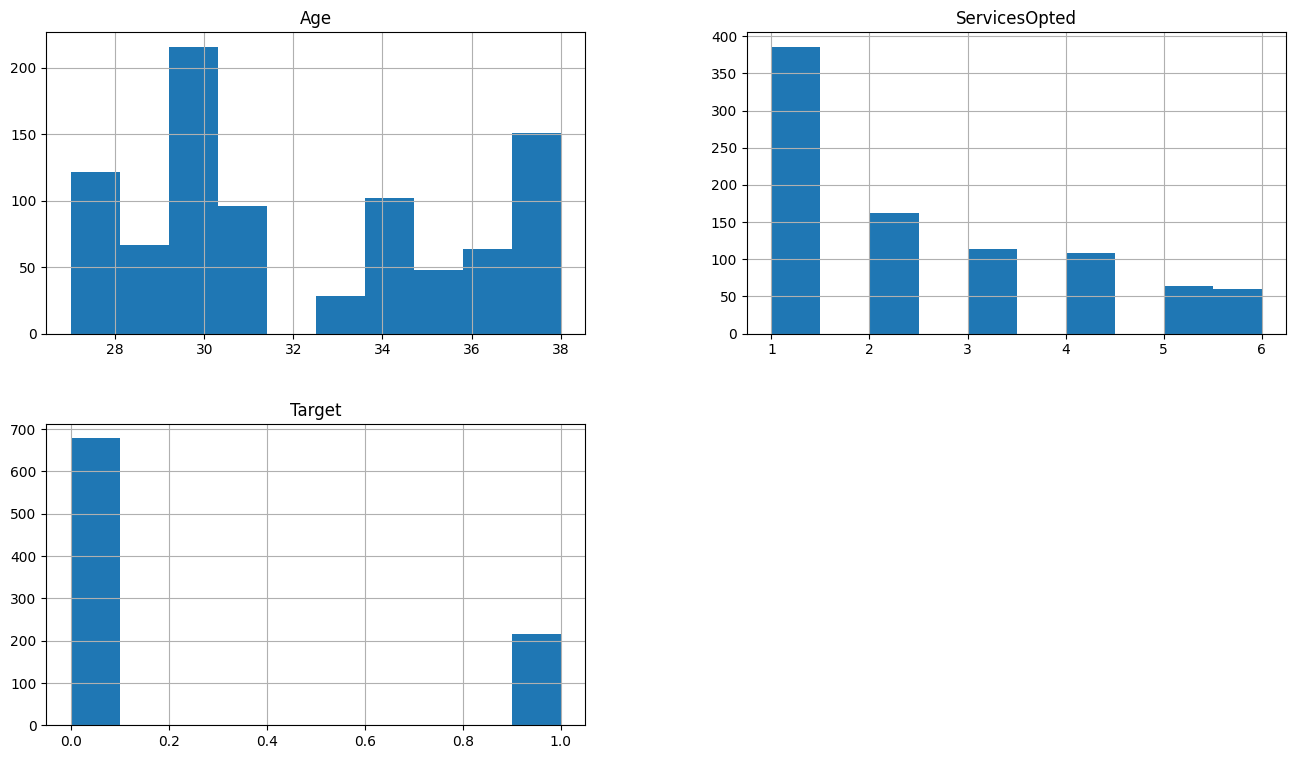

In [6]:
df.hist(figsize=(16, 9))

Min customer's age = 27
Max customer's age = 38



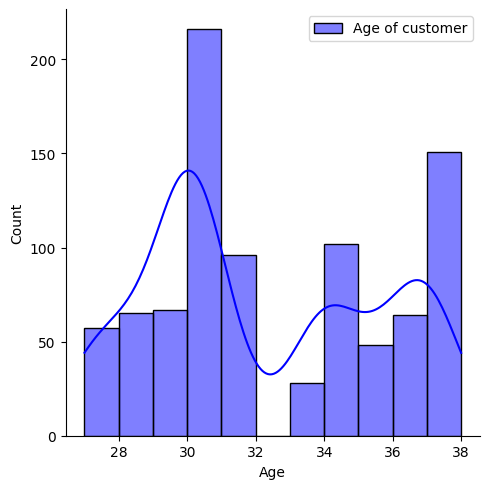

In [7]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print(f"Min customer's age = {min_age}\nMax customer's age = {max_age}\n")

sns.displot(df['Age'], color='blue', label="Age of customer", kde=True)
plt.legend()
plt.show()

In [8]:
df_binarized = pd.DataFrame(index=df.index)

In [9]:
thresholds = [min_age, 32, max_age]
for threshold in thresholds:
    df_binarized[f'age_le_{threshold}'] = df['Age'] <= threshold
    df_binarized[f'age_ge_{threshold}'] = df['Age'] >= threshold

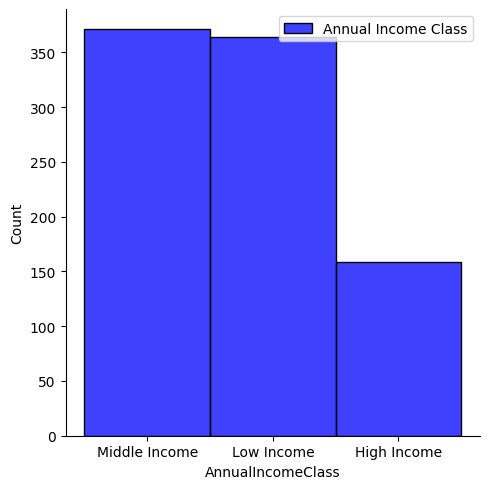

In [10]:
sns.displot(df['AnnualIncomeClass'], color='blue', label="Annual Income Class", kde=False)
plt.legend()
plt.show()

In [11]:
income2num = {
    'Low Income': 1,
    'Middle Income': 2,
    'High Income': 3
}

df = df.replace({'AnnualIncomeClass': income2num})

<ipython-input-11-3e9a4f34b786>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'AnnualIncomeClass': income2num})


In [12]:
thresholds = [1, 2, 3]
for threshold in thresholds:
    df_binarized[f'aic_le_{threshold}'] = df['AnnualIncomeClass'] <= threshold

In [13]:
df_binarized.head()

,age_le_27,age_ge_27,age_le_32,age_ge_32,age_le_38,age_ge_38,aic_le_1,aic_le_2,aic_le_3
0,False,True,False,True,True,False,False,True,True
1,False,True,False,True,True,False,True,True,True
2,False,True,False,True,True,False,False,True,True
3,False,True,True,False,True,False,False,True,True
4,False,True,True,False,True,False,True,True,True


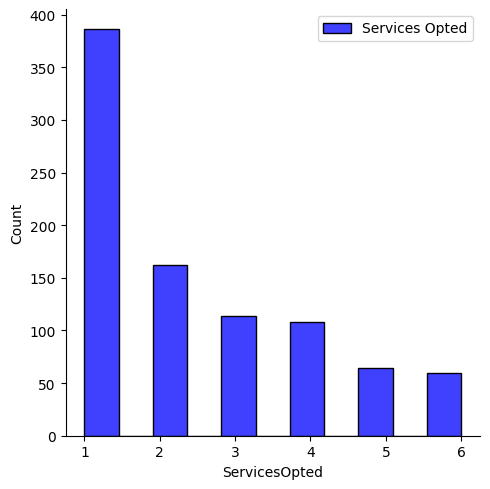

In [14]:
sns.displot(df['ServicesOpted'], color='blue', label="Services Opted", kde=False)
plt.legend()
plt.show()

In [15]:
thresholds = [1, 2, 3]
for threshold in thresholds:
    df_binarized[f'services_opt_le_{threshold}'] = df['ServicesOpted'] <= threshold

In [16]:
# df_binarized['FrequentFlyer'] = df['FrequentFlyer'].replace(['Yes', 'No'], [True, False])
df_binarized['freq_flyer_yes'] = (df['FrequentFlyer'] == 'Yes')
df_binarized['freq_flyer_no'] = (df['FrequentFlyer'] == 'No')
df_binarized['book_hotel_yes'] = (df['BookedHotelOrNot'] == 'Yes')
df_binarized['book_hotel_no'] = (df['BookedHotelOrNot'] == 'No')
df_binarized['acc_sync_yes'] = (df['AccountSyncedToSocialMedia'] == 'Yes')
df_binarized['acc_sync_no'] = (df['AccountSyncedToSocialMedia'] == 'No')

# df_binarized['BookedHotelOrNot'] = df['BookedHotelOrNot'].replace(['Yes', 'No'], [True, False])
# df_binarized['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].replace(['Yes', 'No'], [True, False])

In [17]:
df_binarized.head()

,age_le_27,age_ge_27,age_le_32,age_ge_32,age_le_38,age_ge_38,aic_le_1,aic_le_2,aic_le_3,services_opt_le_1,services_opt_le_2,services_opt_le_3,freq_flyer_yes,freq_flyer_no,book_hotel_yes,book_hotel_no,acc_sync_yes,acc_sync_no
0,False,True,False,True,True,False,False,True,True,False,False,False,False,True,True,False,False,True
1,False,True,False,True,True,False,True,True,True,False,False,False,True,False,False,True,True,False
2,False,True,False,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False
3,False,True,True,False,True,False,False,True,True,False,True,True,False,True,False,True,False,True
4,False,True,True,False,True,False,True,True,True,True,True,True,False,True,False,True,False,True


In [18]:
df_binarized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 953
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age_le_27          894 non-null    bool 
 1   age_ge_27          894 non-null    bool 
 2   age_le_32          894 non-null    bool 
 3   age_ge_32          894 non-null    bool 
 4   age_le_38          894 non-null    bool 
 5   age_ge_38          894 non-null    bool 
 6   aic_le_1           894 non-null    bool 
 7   aic_le_2           894 non-null    bool 
 8   aic_le_3           894 non-null    bool 
 9   services_opt_le_1  894 non-null    bool 
 10  services_opt_le_2  894 non-null    bool 
 11  services_opt_le_3  894 non-null    bool 
 12  freq_flyer_yes     894 non-null    bool 
 13  freq_flyer_no      894 non-null    bool 
 14  book_hotel_yes     894 non-null    bool 
 15  book_hotel_no      894 non-null    bool 
 16  acc_sync_yes       894 non-null    bool 
 17  acc_sync_no        89

In [19]:
df_binarized['Target'] = df['Target']

In [20]:
df_binarized['Target'].value_counts()

,count
Target,
0,678
1,216


We see that the number of positive labels is more than three times smaller than the number of negative labels. That's why we will measure the perfomance with F1 score. And also look at accuracy

## Train-test dataset split

In [21]:
from sklearn.model_selection import train_test_split

df_binarized.index = df_binarized.index.map(str)  # for fcapy api
y = df_binarized['Target']
X_train, X_test, y_train, y_test = train_test_split(df_binarized.drop(columns=['Target']), y, stratify=y, train_size=0.7, shuffle=True, random_state=42)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((625, 18), (625,), (269, 18), (269,))

## Classification using standard ML tools

### Logistic Regression

In [23]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.5
Accuracy score: 0.8066914498141264


### Decision Tree

In [24]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.7521367521367521
Accuracy score: 0.8921933085501859


In [25]:
from sklearn.model_selection import GridSearchCV


parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth' : [1, 2, 3, 4, 5, 6],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 3, 5, 7, 10]}

tree = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(tree, parameters, verbose = 3, scoring = 'f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.605 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.597 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.493 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.605 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.597 total time=   0.0s
[CV 4/5] END cri

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='f1', verbose=3)

In [26]:
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.7796610169491526
Accuracy score: 0.9033457249070632


In [27]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.765625
Accuracy score: 0.8884758364312267


In [29]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth' : [1, 2, 3, 4, 5, 6],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 3, 5, 7, 10]}

forest = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(forest, parameters, verbose = 3, scoring = 'f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.605 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.597 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.493 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.605 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.597 total time=   0.0s
[CV 4/5] END cri

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='f1', verbose=3)

In [30]:
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.7796610169491526
Accuracy score: 0.9033457249070632


In [31]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.75
Accuracy score: 0.8736059479553904


In [33]:
parameters = {'learning_rate': [1, 0.1, 0.01, 0.001],
              'n_estimators':[10, 50, 100, 200],
              'subsample' : [1.0, 0.75, 0.5, 0.25]}

boost = GradientBoostingClassifier(random_state=42)
clf = GridSearchCV(boost, parameters, verbose = 3, scoring = 'f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.738 total time=   0.0s
[CV 2/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.716 total time=   0.0s
[CV 3/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.557 total time=   0.0s
[CV 4/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.691 total time=   0.0s
[CV 5/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.667 total time=   0.0s
[CV 1/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.656 total time=   0.0s
[CV 2/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.746 total time=   0.0s
[CV 3/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.545 total time=   0.0s
[CV 4/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.642 total time=   0.0s
[CV 5/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.615 total time= 

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [10, 50, 100, 200],
                         'subsample': [1.0, 0.75, 0.5, 0.25]},
             scoring='f1', verbose=3)

In [34]:
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.78125
Accuracy score: 0.895910780669145


### CatBoost

In [35]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [36]:
from catboost import CatBoostClassifier


clf = CatBoostClassifier(verbose=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.7633587786259542
Accuracy score: 0.8847583643122676


In [37]:
parameters = {'depth': [6, 8, 10],
              'learning_rate': [0.01, 0.05, 0.1],
              'iterations': [100, 200, 300]
              }

cb = CatBoostClassifier(verbose=False)
clf = GridSearchCV(cb, parameters, verbose = 3, scoring = 'f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.633 total time=   0.3s
[CV 2/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.635 total time=   0.2s
[CV 3/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.517 total time=   0.3s
[CV 4/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.560 total time=   0.3s
[CV 5/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.520 total time=   0.4s
[CV 1/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.656 total time=   0.3s
[CV 2/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.743 total time=   0.3s
[CV 3/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.542 total time=   0.2s
[CV 4/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.588 total time=   0.2s
[CV 5/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.560 total time=   0.3s
[CV 1/5] END depth=6, iterations=100, 

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7b501ce13ca0>,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='f1', verbose=3)

In [38]:
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.7368421052631579
Accuracy score: 0.8698884758364313


In [39]:
clf.best_params_

{'depth': 6, 'iterations': 200, 'learning_rate': 0.1}

## Neural FCA

In [1]:
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=538974 sha256=e764d39c98bc47b279e253e05e957b7ae01db608b299cc27ba5d6af8afbffb3a
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1104576 sha256=6f84fdeb8cc8625570c027e123cd23bb669f118458764baf5f41aca22e3365d4
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch-sparse
Looking in links: https://data.pyg.org/whl/torc

In [23]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report

from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

import neural_lib as nl

In [24]:
K_train = FormalContext.from_pandas(X_train)
K_train

FormalContext (625 objects, 18 attributes, 6314 connections)
   |age_le_27|age_ge_27|age_le_32|age_ge_32|age_le_38|...|freq_flyer_no|book_hotel_yes|book_hotel_no|acc_sync_yes|acc_sync_no|
393|         |        X|        X|         |        X|...|             |              |            X|            |          X|
691|         |        X|         |        X|        X|...|            X|              |            X|            |          X|
284|         |        X|        X|         |        X|...|            X|              |            X|            |          X|
246|         |        X|         |        X|        X|...|             |             X|             |           X|           |
749|         |        X|         |        X|        X|...|             |              |            X|            |          X|
198|        X|        X|        X|         |        X|...|            X|             X|             |            |          X|
271|         |        X|         |        X|      

In [25]:
L = ConceptLattice.from_context(K_train, algo='Sofia', is_monotone=True)
len(L)

99

In [26]:
from sklearn.metrics import f1_score

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

In [32]:
n_concepts = 15
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [33]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [34]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

In [37]:
descr = {'freq_flyer_yes', 'freq_flyer_no'}

traced = cn.trace_description(descr, include_targets=False)

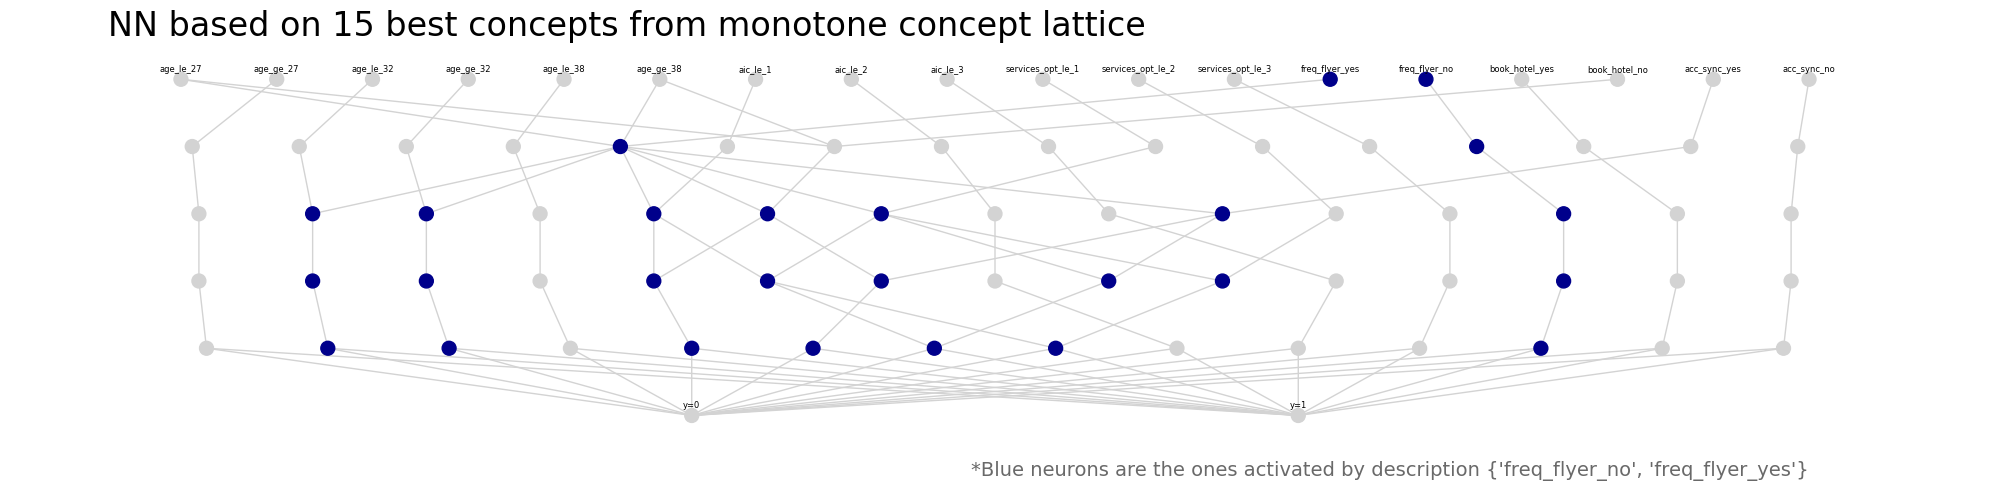

In [38]:
fig, ax = plt.subplots(figsize=(20,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))
                ],
               node_size=100,
               node_label_font_size=6
)
plt.title(f'NN based on '+str(n_concepts)+' best concepts from monotone concept lattice', loc='left', x=0.05, size=24)

plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3, f'*Blue neurons are the ones activated by description {descr}', fontsize=14, ha='right', color='dimgray')

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('nn_baseline.png')
plt.show()

### 15 concepts, ReLU, 2000 epochs

In [40]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=2000, nonlinearity=nn.ReLU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 0 0 0 0 0 1]
Class prediction with probabilities [[4.8053607e-01 5.1946396e-01]
 [9.9998355e-01 1.6397615e-05]
 [4.8053607e-01 5.1946396e-01]
 [9.9998355e-01 1.6397615e-05]
 [8.7370205e-01 1.2629801e-01]
 [9.9998355e-01 1.6397615e-05]
 [9.9998355e-01 1.6397615e-05]
 [9.9998355e-01 1.6397615e-05]
 [9.9998355e-01 1.6397615e-05]
 [4.8053607e-01 5.1946396e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.5942028985507246
Accuracy score: 0.79182156133829


It works, but quite bad

### 15 concepts, GELU, 2000 epochs

In [42]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.GELU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 0 0 0 0 0 1]
Class prediction with probabilities [[3.31365943e-01 6.68634057e-01]
 [1.00000000e+00 2.12088200e-13]
 [1.15590066e-01 8.84409964e-01]
 [1.00000000e+00 3.15177084e-15]
 [9.99999166e-01 8.19046363e-07]
 [1.00000000e+00 1.77724209e-13]
 [1.00000000e+00 2.20613913e-16]
 [1.00000000e+00 1.38215557e-12]
 [1.00000000e+00 5.75003827e-15]
 [4.43996698e-01 5.56003273e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.6333333333333333
Accuracy score: 0.8364312267657993


In [43]:
edge_weights = cn.edge_weights_from_network()

/usr/local/lib/python3.10/dist-packages/sparselinear/sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:651.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


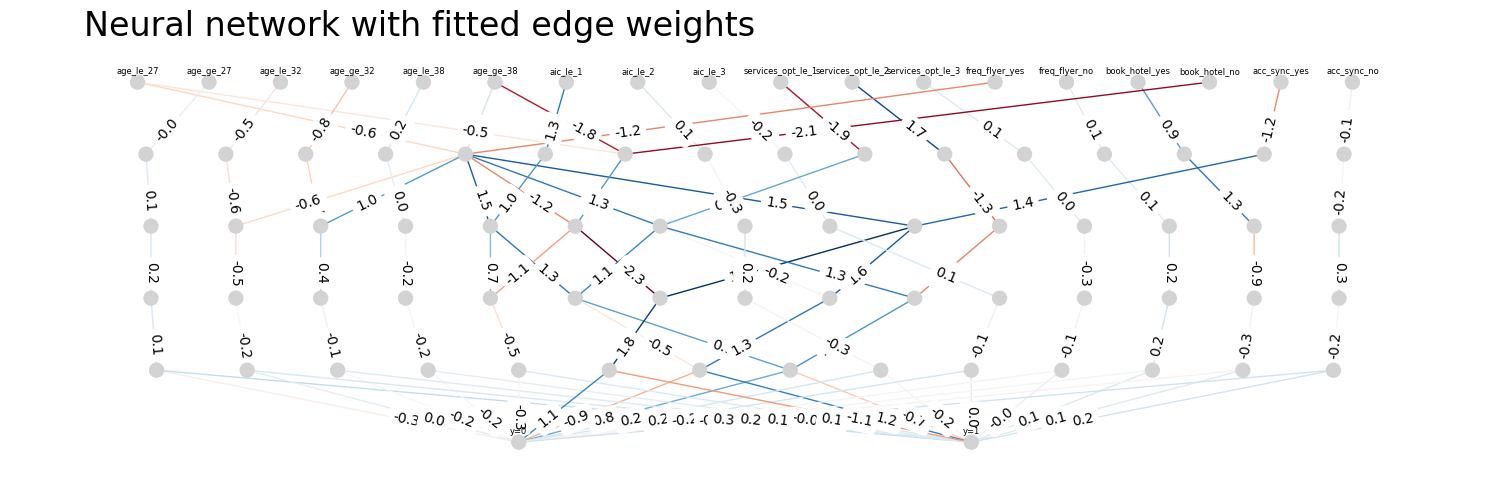

In [44]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,

               node_size=100,
               node_label_font_size=6
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_gelu_e24.png')
plt.show()

### 15 concepts, SiLU, 2000 epochs

In [46]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.SiLU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 0 0 0 0 0 1]
Class prediction with probabilities [[3.2496378e-01 6.7503619e-01]
 [9.9999952e-01 4.4486100e-07]
 [4.9574289e-02 9.5042568e-01]
 [1.0000000e+00 1.3301844e-09]
 [9.9998796e-01 1.2005067e-05]
 [9.9999928e-01 6.6621675e-07]
 [1.0000000e+00 9.8757624e-10]
 [1.0000000e+00 2.6773108e-09]
 [1.0000000e+00 1.8179420e-09]
 [3.9297077e-01 6.0702926e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.6333333333333333
Accuracy score: 0.8364312267657993


### Focal Loss

Cause we have imbalanced dataset (1:3 positives to negatives) and we see above that our network is overconfident, let's try loss that could solve these problems -- Focal Loss

In [47]:
#  Genuinely took from https://github.com/mathiaszinnen/focal_loss_torch

import torch
import torch.nn as nn
from torch.nn.functional import one_hot
from torch import Tensor
from typing import Union


class FocalLoss(nn.Module):
    """Computes the focal loss between input and target
    as described here https://arxiv.org/abs/1708.02002v2

    Args:
        gamma (float):  The focal loss focusing parameter.
        weights (Union[None, Tensor]): Rescaling weight given to each class.
        If given, has to be a Tensor of size C. optional.
        reduction (str): Specifies the reduction to apply to the output.
        it should be one of the following 'none', 'mean', or 'sum'.
        default 'mean'.
        ignore_index (int): Specifies a target value that is ignored and
        does not contribute to the input gradient. optional.
        eps (float): smoothing to prevent log from returning inf.
    """
    def __init__(
            self,
            gamma,
            weights: Union[None, Tensor] = None,
            reduction: str = 'mean',
            ignore_index=-100,
            eps=1e-16
            ) -> None:
        super().__init__()
        if reduction not in ['mean', 'none', 'sum']:
            raise NotImplementedError(
                'Reduction {} not implemented.'.format(reduction)
                )
        assert weights is None or isinstance(weights, Tensor), \
            'weights should be of type Tensor or None, but {} given'.format(
                type(weights))
        self.reduction = reduction
        self.gamma = gamma
        self.ignore_index = ignore_index
        self.eps = eps
        self.weights = weights

    def _get_weights(self, target: Tensor) -> Tensor:
        if self.weights is None:
            return torch.ones(target.shape[0])
        weights = target * self.weights
        return weights.sum(dim=-1)

    def _process_target(
            self, target: Tensor, num_classes: int, mask: Tensor
            ) -> Tensor:

        #convert all ignore_index elements to zero to avoid error in one_hot
        #note - the choice of value 0 is arbitrary, but it should not matter as these elements will be ignored in the loss calculation
        target = target * (target!=self.ignore_index)
        target = target.view(-1)
        return one_hot(target, num_classes=num_classes)

    def _process_preds(self, x: Tensor) -> Tensor:
        if x.dim() == 1:
            x = torch.vstack([1 - x, x])
            x = x.permute(1, 0)
            return x
        return x.view(-1, x.shape[-1])

    def _calc_pt(
            self, target: Tensor, x: Tensor, mask: Tensor
            ) -> Tensor:
        p = target * x
        p = p.sum(dim=-1)
        p = p * ~mask
        return p

    def forward(self, x: Tensor, target: Tensor) -> Tensor:
        assert torch.all((x >= 0.0) & (x <= 1.0)), ValueError(
            'The predictions values should be between 0 and 1, \
                make sure to pass the values to sigmoid for binary \
                classification or softmax for multi-class classification'
        )
        mask = target == self.ignore_index
        mask = mask.view(-1)
        x = self._process_preds(x)
        num_classes = x.shape[-1]
        target = self._process_target(target, num_classes, mask)
        weights = self._get_weights(target).to(x.device)
        pt = self._calc_pt(target, x, mask)
        focal = 1 - pt
        nll = -torch.log(self.eps + pt)
        nll = nll.masked_fill(mask, 0)
        loss = weights * (focal ** self.gamma) * nll
        return self._reduce(loss, mask, weights)

    def _reduce(self, x: Tensor, mask: Tensor, weights: Tensor) -> Tensor:
        if self.reduction == 'mean':
            return x.sum() / (~mask * weights).sum()
        elif self.reduction == 'sum':
            return x.sum()
        else:
            return x

In [48]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=2))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[0.45691615 0.54308385]
 [0.7463771  0.25362286]
 [0.40418574 0.5958143 ]
 [0.82029474 0.1797053 ]
 [0.34870508 0.6512949 ]
 [0.73627484 0.2637252 ]
 [0.6870136  0.3129864 ]
 [0.860856   0.13914402]
 [0.8458225  0.15417752]
 [0.49860686 0.50139314]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.6518518518518519
Accuracy score: 0.8252788104089219


In [49]:
edge_weights = cn.edge_weights_from_network()

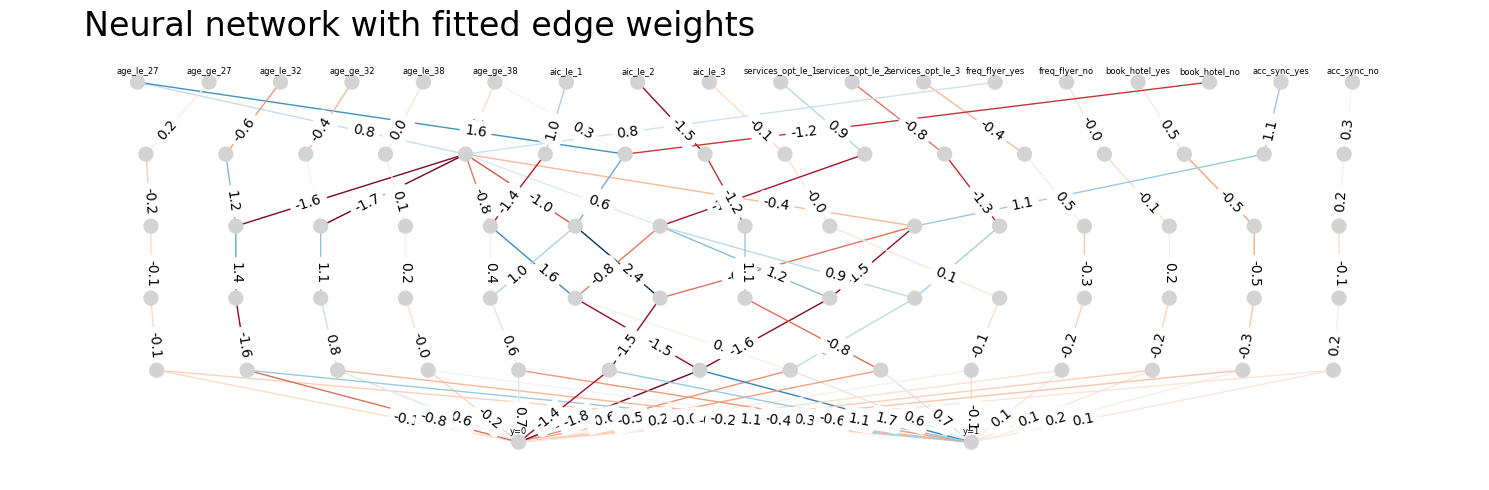

In [50]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,

               node_size=100,
               node_label_font_size=6
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_fl_g2_e2000_c24.png')
plt.show()

### Adding more concepts

In [53]:
n_concepts = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [54]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=2))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[4.1890949e-01 5.8109051e-01]
 [6.4026046e-01 3.5973951e-01]
 [4.1182399e-01 5.8817601e-01]
 [9.8037982e-01 1.9620165e-02]
 [3.1005514e-01 6.8994480e-01]
 [6.4221340e-01 3.5778666e-01]
 [9.1856444e-01 8.1435531e-02]
 [9.9999809e-01 1.8779219e-06]
 [9.9999940e-01 5.5937278e-07]
 [4.6143359e-01 5.3856641e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.7338129496402878
Accuracy score: 0.862453531598513


### 15 concepts, less gamma (1.5)

In [57]:
n_concepts = 15
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [59]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1.5))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 0]
Class prediction with probabilities [[0.48654777 0.5134523 ]
 [0.8453865  0.15461344]
 [0.48086178 0.5191382 ]
 [0.75684446 0.24315552]
 [0.17580417 0.82419586]
 [0.8505315  0.14946842]
 [0.5688657  0.4311342 ]
 [0.98711747 0.01288258]
 [0.9955787  0.00442124]
 [0.52633077 0.47366923]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.6422018348623854
Accuracy score: 0.8550185873605948


### 50 concepts, less gamma (1.5)

In [60]:
n_concepts = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [62]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1.5))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[4.1583997e-01 5.8416009e-01]
 [7.2725725e-01 2.7274272e-01]
 [4.1165313e-01 5.8834690e-01]
 [9.7441190e-01 2.5588097e-02]
 [4.1195759e-01 5.8804238e-01]
 [7.0409530e-01 2.9590473e-01]
 [9.8456174e-01 1.5438244e-02]
 [9.9995434e-01 4.5703764e-05]
 [9.9638367e-01 3.6163207e-03]
 [4.6599144e-01 5.3400856e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.75
Accuracy score: 0.8736059479553904


### 50 concepts, gamma=1

In [69]:
n_concepts = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [70]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[0.04657727 0.9534227 ]
 [0.77583903 0.224161  ]
 [0.06767787 0.9323221 ]
 [0.89834803 0.10165198]
 [0.01147627 0.98852366]
 [0.7521508  0.24784921]
 [0.8975687  0.10243134]
 [0.8936598  0.10634026]
 [0.88764554 0.11235451]
 [0.47309294 0.52690697]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.746031746031746
Accuracy score: 0.8810408921933085


### Let's also try to choose concepts based on recall, cause we really need to determine True labels correctly.

In [73]:
from sklearn.metrics import recall_score

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['recall_score'] = recall_score(y_train, y_preds)

In [74]:
n_concepts = 50
best_concepts = list(L.measures['recall_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [75]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[0.05575609 0.9442439 ]
 [0.84169257 0.15830743]
 [0.05199465 0.9480053 ]
 [0.82795066 0.17204934]
 [0.08466238 0.9153376 ]
 [0.75280523 0.24719475]
 [0.7900468  0.20995323]
 [0.86264604 0.13735403]
 [0.8606029  0.13939707]
 [0.48854998 0.51145005]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.7272727272727273
Accuracy score: 0.8661710037174721
